## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_csv("/Users/muneebsahibzada/Downloads/Automobile.csv")

## Select Relevant Numerical Features


In [3]:
numerical_features = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]

## Normalize Data

In [4]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

## Define Query Cars and Their Indices


In [5]:
# Define the list of query cars
query_cars = ["Ford Mustang", "Honda Civic", "Toyota Corolla"]

# Create a dictionary of query indices
query_indices = {car: df[df["name"].str.lower().str.contains(car.lower())].index[0] for car in query_cars}

## Compute Euclidean Distances


In [6]:
distances = cdist(df_scaled[numerical_features], df_scaled[numerical_features], metric="euclidean")

## Find Top 10 Similar Cars


In [7]:
top_similar_cars = {}
for car, idx in query_indices.items():
    similar_indices = distances[idx].argsort()[1:11] 
    top_similar_cars[car] = df.iloc[similar_indices][["name", "mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]


## Display Results

In [8]:
for car, similar_cars in top_similar_cars.items():
    print(f"Top 10 similar cars to {car}:")
    print(similar_cars)
    print("\n")

Top 10 similar cars to Ford Mustang:
                           name   mpg  cylinders  displacement  horsepower  \
47             pontiac firebird  19.0          6         250.0       100.0   
36              ford torino 500  19.0          6         250.0        88.0   
37                  amc matador  18.0          6         232.0       100.0   
35    chevrolet chevelle malibu  17.0          6         250.0       100.0   
45   amc hornet sportabout (sw)  18.0          6         258.0       110.0   
34    plymouth satellite custom  16.0          6         225.0       105.0   
107                 amc gremlin  18.0          6         232.0       100.0   
16                   amc hornet  18.0          6         199.0        97.0   
99                   amc hornet  18.0          6         232.0       100.0   
33                  amc gremlin  19.0          6         232.0       100.0   

     weight  acceleration  model_year  
47     3282          15.0          71  
36     3302          15.

## Visualization (example for one car)


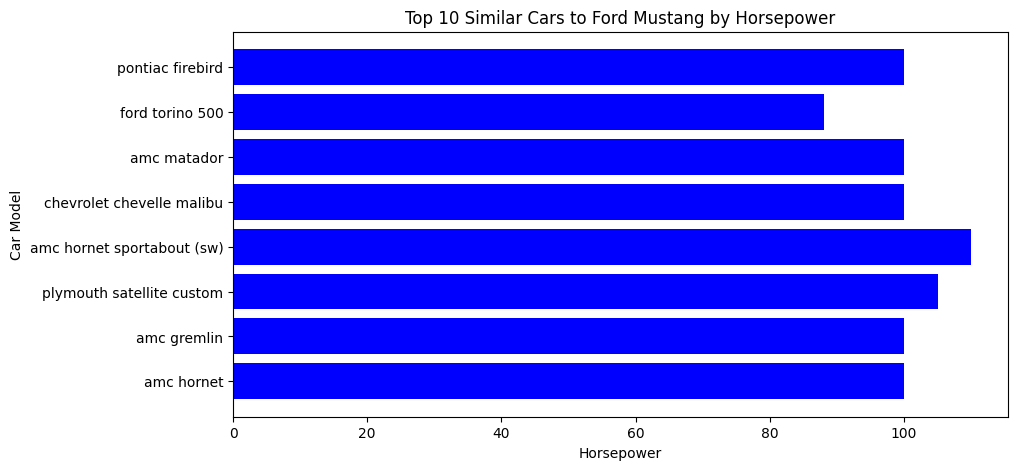

In [9]:
plt.figure(figsize=(10, 5))
plt.barh(top_similar_cars["Ford Mustang"]["name"], top_similar_cars["Ford Mustang"]["horsepower"], color="blue")
plt.xlabel("Horsepower")
plt.ylabel("Car Model")
plt.title("Top 10 Similar Cars to Ford Mustang by Horsepower")
plt.gca().invert_yaxis()
plt.show()